## Merging Real and Fake Data

In [571]:
import pandas
import nltk

true_data_files = ['Combined_RealNews.csv']

def process_true_data(inputfile):
    data = []
    for file in true_data_files:
        input_dataframe = pandas.read_csv(file, index_col=0)
        data.append(input_dataframe)
    true_data_dataframe = pandas.concat(data, ignore_index=True)
    text_list = true_data_dataframe["Text"].tolist()
    text_string = ''
    for word in text_list:
        #Upper and lower case matter so make everything lowercase
        text_string += ''+str(word).lower()
    #output = {"Text":[], "Code":[]}
    #Create sentences from the text with the word disney in it
    #search = "vaccine"
    #seperated_sentences = [s for s in nltk.sent_tokenize(text_string) if search in s]
    
    search_terms = ["covid", "covid-19"]  # Add as many as you like
    seperated_sentences = [s for s in nltk.sent_tokenize(text_string) if any(term in s for term in search_terms)]
    
    for sentence in seperated_sentences:
        output['Text'].append(sentence)
        #0 in Code means this is not fake news
        output['Code'].append(0)
    return True

fakenews_data_files = ['Combined_FakeNews.csv']

def process_fakenews_data(fakenewsinputfile):
    data = []
    for file in fakenews_data_files:
        input_dataframe = pandas.read_csv(file, index_col=0)
        data.append(input_dataframe)
    fakenews_dataframe = pandas.concat(data, ignore_index=True)
    text_list = fakenews_dataframe["Text"].tolist()
    text_string = ''
    for word in text_list:
        #Upper and lower case matter so make everything lowercase
        text_string += ''+str(word).lower()
    #output2 = {"Text":[], "Code":[]}
    #Create sentences from the text with the word disney in it
    #search = "vaccine"
    #seperated_sentences = [s for s in nltk.sent_tokenize(text_string) if search in s]

    search_terms = ["covid", "covid-19"]  # Add as many as you like
    seperated_sentences = [s for s in nltk.sent_tokenize(text_string) if any(term in s for term in search_terms)]
    
    for sentence in seperated_sentences:
        output['Text'].append(sentence)
        #print(output['CleanText'])
        #1 in Code means this is fake news
        output['Code'].append(1)
        #print(output['Code'])
    return True

output = {"Text":[], "Code":[]}
process_true_data(true_data_files)
process_fakenews_data(fakenews_data_files)


results = pandas.DataFrame(output)
#Shuffle row order in the dataframe
from sklearn.utils import shuffle
results = shuffle(results)

results.to_csv('Combined_Raw_Text1.csv', index=True, index_label="Index")
    

print("done")


done


## First Cleaning

Does a Column Have an Empty Cell?
Text    0
Code    0
dtype: int64




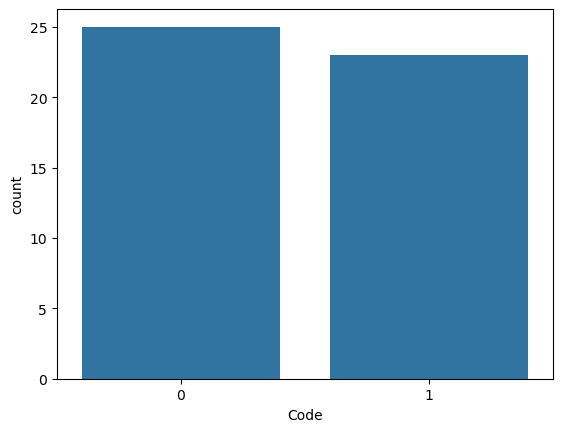

done


In [574]:
import pandas
import seaborn as sns
import unidecode
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

input_dataframe = pandas.read_csv("Combined_Raw_Text1.csv", index_col=0)

# Check for null values in the dateset
count_empty_rows_in_columns = input_dataframe.isna().sum()
print("Does a Column Have an Empty Cell?")
print(count_empty_rows_in_columns)
print("\n")

# count unique values in the class column from the input dataframe
sns.countplot(x='Code', data=input_dataframe)
plt.show()

text_list = input_dataframe["Text"].tolist()

code_list = input_dataframe["Code"].tolist()

# Cleaning the text
# convert text to lower case
textlist_lowercase = [i.lower() for i in text_list]

# remove special characters
textlist_lowercase_nospecial_characters = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

# Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

textwithoutstopwords = []
for item in textlist_lowercase_nospecial_characters:
    string = ""
    for word in item.split(" "):
        if word.strip() in stopwords_list:
            continue
        else:
            string = string + " " + word
    textwithoutstopwords.append(string)

linksremoved = []
# Remove links
for text in textwithoutstopwords:
    remove_https = re.sub(r'http\S+', '', text)
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    linksremoved.append(remove_com)

# Remove special characters
cleanedtextwithoutlinks = [unidecode.unidecode(text) for text in linksremoved]

# Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+", " ", text) for text in cleanedtextwithoutlinks]

#print(len(cleantext))

output = {"CleanText": [], "Code": []}

for text in cleantext:
    output['CleanText'].append(text)

for code in code_list:
    output['Code'].append(code)

# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('Combined_Cleaned_Text1.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")     


## Word cloud and extra cleaning 

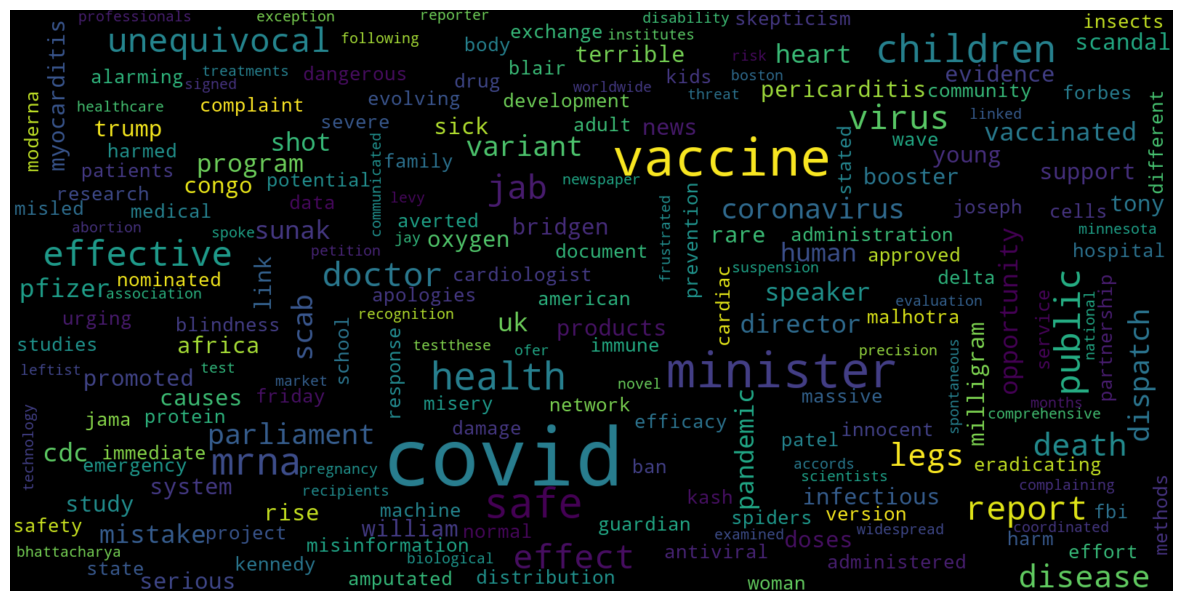

done


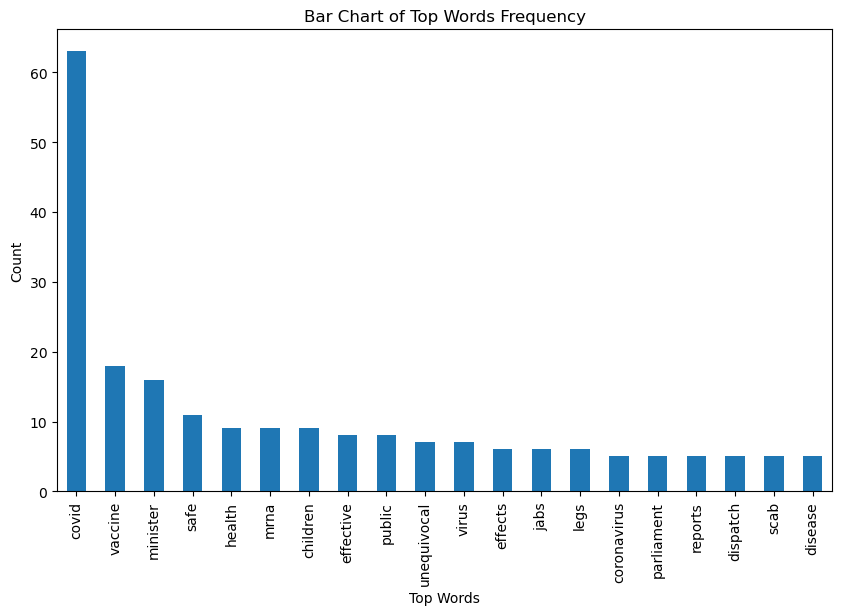

In [618]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below
inputdata = pandas.read_csv('Combined_Cleaned_Text1.csv', header=[0], index_col=0).to_dict()
#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
textdictionary = inputdata.get("CleanText")

#I am converting dictionary to a list so I can analyze the data
textlist = list(textdictionary.values())

stopwords = [
    "think", "might", "like", "get", "do", "go", "will", "say", "said", "one", "two", "three", "four",
    "last", "second", "even", "already", "actually", "however", "though", "within", "every", "about",
    "thanks", "quite", "mean", "wrong", "also", "check", "really", "using", "kind", "ask", "show", "done",
    "question", "comment", "point", "see", "keep", "way", "much", "thing", "back", "again", "let", "th",
    "time", "year", "mail", "hand", "read", "member", "minute", "huge", "went", "current", "supposed",
    "clear", "given", "including", "recently", "made", "correct", "although", "leave", "started", "sent",
    "whether", "trying", "person", "hope", "accord", "context", "whole", "thank", "quote", "right",
    "talk", "gone", "true", "week", "daily", "serve", "held", "toward", "ensure", "called", "says", "told",
    "may", "know", "want", "need", "use", "based", "reason", "side", "earlier", "asked", "tell", "looking",
    "well", "still", "many", "could", "would", "should", "going", "did", "does", "live", "result", "number",
    "story", "account", "around", "shared", "update", "january", "july", "top", "awesome", "outside",
    "contacted", "shown", "error", "day", "ago", "today", "something", "take", "getting", "case", "couple",
    "long", "share", "cause", "causing", "new", "work", "home", "statement", "look", "watch", "house",
    "anything", "among", "everything", "basically", "sorry", "anyone", "please", "help", "grow", "used",
    "fact", "happening", "open", "list", "care", "become", "call", "describe", "fit", "active", "course",
    "letter", "channel", "saying", "nothing", "seriously", "eventually", "watching", "total", "working",
    "heard", "read", "center", "product", "level", "appears", "org", "co", "domain", "born", "ended",
    "poo", "via", "posted", "includes", "provided", "full", "series", "published", "converted","sudden","gb",
    "ultimately","settle","lost","um","uh","dr","give","vaccines","mr","days","instead","longer","found", "experts", 
    "members", "previously", "continue", "taking","things", "according", "years", "recent", "world", "shows", "make", "helps",
     "common", "put", "aged","widely", "along", "information", "related", "previous", "fully","reporting", "officials", "country", 
     "st", "available", "opposition", "absolutely","helped", "rapid", "recommendations",  "five", "officials", "aged", "widely", 
    "available", "common", "valid","video","comments","known","ivon","expressed","increased","almost","better","beings","asserting",
    "icin", "latest", "changes","another","hands","less","come","joining","homes",'u',"goes","brought","usually","ju","lining","outer",
    "box","excess","richie","lining","prime","british","people","unless","admitted","hindsight","loses","horizon","weekly","billion","notable",
    "contributing","takes","released", "instances","comes","calls","rollout","wait", "despite","us"
    
]



# Lowercase everything
textlist = [text.lower() for text in textlist]

# Remove punctuation
import string
textlist = [re.sub(f"[{string.punctuation}]", " ", text) for text in textlist]

# Remove stopwords
for word in stopwords:
    textlist = [re.sub(rf"\b{word}\b", "", text) for text in textlist]

#Draw a word cloud diagram to verify the input data
consolidated = ' '.join(
    word for word in textlist)
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

#Draw a bar chart demonstrating top 20 words from the cleaned text for verification 
vec = CountVectorizer().fit(textlist) 
bag_of_words = vec.transform(textlist) 
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) 
    
common_words = words_freq[:20] 

topwordsdataframe = pandas.DataFrame(common_words, columns=['Review', 'count']) 
  
topwordsdataframe.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 


output = {"CleanText": [], "Code": []}

#I created a new dictionary below for the Text column in the csv file
codedictionary = inputdata.get("Code")

#I am converting dictionary to a list so I can analyze the data
codelist = list(codedictionary.values())

for text in textlist:
    output['CleanText'].append(text)

for code in codelist:
    output['Code'].append(code)

# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('Combined_Cleaned_Text2.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")


__I kept some words like _apologies,legs,evolving,misled,following,unequivocal..etc_ because they are important in the context of COVID, vaccines, health, and politics.These terms carry important value in the context of COVID, vaccines, health, and politics, and help maintain the accuracy and relevance of the analysis.__

In [587]:
import pandas as pd
from collections import Counter
import re

# Load cleaned text
df = pd.read_csv('Combined_Cleaned_Text2.csv', index_col=0)

# Combine all cleaned text into one string
all_text = ' '.join(df['CleanText'].dropna().tolist())

# Tokenize and normalize
words = re.findall(r'\b[a-z]+\b', all_text.lower())

# Count word frequencies
word_counts = Counter(words)

# Print top 300 most common words
print("Top 200 Most Frequent Words:\n")
for word, count in word_counts.most_common(200):
    print(f"{word}: {count}")

Top 200 Most Frequent Words:

covid: 63
vaccine: 18
minister: 16
safe: 11
health: 9
mrna: 9
children: 9
public: 8
effective: 8
virus: 7
unequivocal: 7
legs: 6
jabs: 6
effects: 6
horizon: 6
disease: 5
reports: 5
coronavirus: 5
parliament: 5
dispatch: 5
scab: 5
opportunity: 4
cdc: 4
pfizer: 4
director: 4
human: 4
program: 4
variants: 4
heart: 4
us: 4
vaccinated: 4
pandemic: 4
speaker: 4
sunak: 4
uk: 4
doctor: 4
doctors: 3
infectious: 3
trump: 3
products: 3
rise: 3
deaths: 3
serious: 3
sick: 3
study: 3
link: 3
shots: 3
support: 3
causes: 3
myocarditis: 3
pericarditis: 3
rare: 3
young: 3
evidence: 3
news: 3
death: 3
bridgen: 3
tony: 3
system: 3
promoted: 3
scandal: 3
terrible: 3
mistake: 3
africa: 3
william: 3
congo: 3
doses: 3
oxygen: 3
antiviral: 2
report: 2
guardian: 2
massive: 2
booster: 2
woman: 2
nominated: 2
document: 2
rollout: 2
alarming: 2
studies: 2
response: 2
urging: 2
friday: 2
jama: 2
network: 2
potential: 2
administered: 2
hospital: 2
development: 2
notable: 2
immediate: 2


# Q3 - Decision Tree Optimization

Number of Rows and Columns: (48, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 26 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'max_depth': 85}
   Actual Target  Predicted Target
0              0                 0
1              1                 1
2              1                 1
3              1                 1
4              0                 0
5              0                 1
6              1                 1
7              0                 0
8              1                 1
9              0                 1


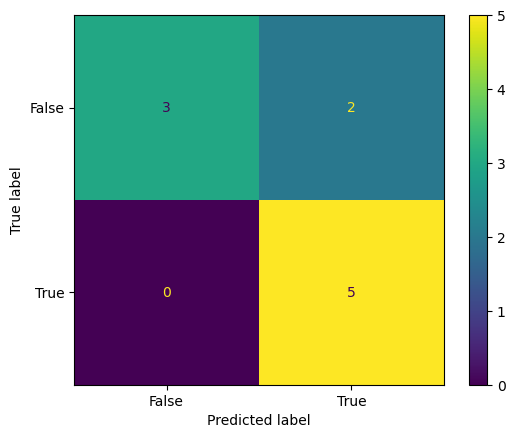

Accuracy:  0.8
Precision:  0.7142857142857143
Recall:  1.0
F1:  0.8333333333333334
Predicted class (0=real, 1=fake): 0
done


In [513]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Combined_Cleaned_Text2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Train the Model
from sklearn.tree import DecisionTreeClassifier 
basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
parameters = {'max_depth': [10, 50, 85, 150, 192, 250, 500]}

#This is how we are creating a validation data set
#Use a small percentage of the train data for validation purposes
from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=5)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)



#Make predictions by using the optimized model
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)


#Make a single prediction based on new data
test = ['breaking: vaccine microchip conspiracy spreads again online']
test_vec = vectorization.transform(test)
predicted_value = optimizedmodel.predict(test_vec)
print("Predicted class (0=real, 1=fake):", predicted_value[0])



print("done")


Optimized Paramater: {'max_depth': 85} ,

Accuracy of the optimized model :Accuracy: 0.8 , Precision: 0.71 , Recall:1 , F1 Score:  0.83 

New Data: 0 → real news

__The optimized decision tree model achieved 80% accuracy with perfect recall (1.0), meaning it correctly identified all fake news samples. However, the precision (0.71) shows that some real news was misclassified as fake. The high F1 score (0.83) reflects a good overall balance between precision and recall.__

# Q4 - Random Forest Optimization

Number of Rows and Columns: (48, 2)

Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 47 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'max_depth': 10, 'n_estimators': 85}
   Actual Target  Predicted Target
0              1                 1
1              0                 0
2              0                 0
3              1                 0
4              0                 0
5              0                 0
6              1                 0
7              1                 0
8              0                 0
9              0                 0


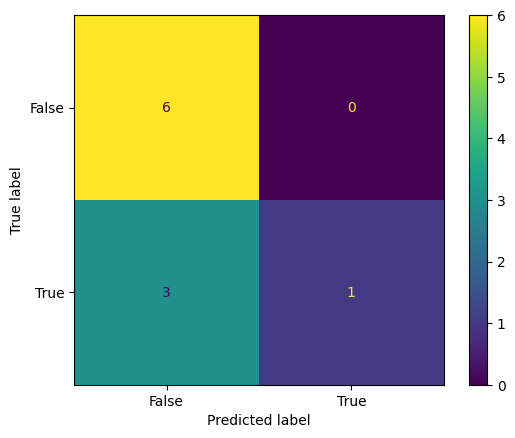

Accuracy:  0.7
Precision:  1.0
Recall:  0.25
F1:  0.4
Predicted class (0=real, 1=fake): 0
done


In [532]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load data
input_dataframe = pandas.read_csv('Combined_Cleaned_Text2.csv', header=[0], index_col=0)
shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

# Summary info
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

# Split features and target
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

independent_variable_train, independent_variable_test, dependent_variable_train, dependent_variable_test = train_test_split(
    independent_variable_array, dependent_variable_array, test_size=0.2, random_state=42
)

# Vectorize text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
independent_variable_train = vectorization.fit_transform(independent_variable_train.tolist()) 
independent_variable_test = vectorization.transform(independent_variable_test.tolist())


# Train the Random Forest Model with GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

basemodel = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [10, 50, 85, 150, 192, 250, 500],
    'max_depth': [10, 50, 85, 150, 192, 250, 500]
}

grid_model = GridSearchCV(basemodel, parameters, cv=5)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)

# Make predictions
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({
    'Actual Target': dependent_variable_test.squeeze(),
    'Predicted Target': predicted_values.squeeze()
})
print(predictions_dataframe)

# Evaluation
from sklearn import metrics
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

confusionmatrix = confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze())
confusionmatrix_display = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=[False, True])
confusionmatrix_display.plot()
plt.show()

accuracy = accuracy_score(dependent_variable_test, predicted_values)
precision = precision_score(dependent_variable_test, predicted_values, zero_division=0)
recall = recall_score(dependent_variable_test, predicted_values, zero_division=0)
f1 = f1_score(dependent_variable_test, predicted_values, zero_division=0)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

# Make a single prediction
test = ['Scientists confirm the COVID-19 vaccine turns people into 5G antennas, warns top secret report']
test_vec = vectorization.transform(test)
predicted_value = optimizedmodel.predict(test_vec)
print("Predicted class (0=real, 1=fake):", predicted_value[0])

print("done")


Optimized Parameters: {'max_depth': 10, 'n_estimators': 100}

Accuracy of the optimized model: Accuracy: 0.7, Precision: 1.0, Recall: 0.25, F1 Score: 0.4

New Data: 0 → real news

__The optimized random forest model reached 70% accuracy with perfect precision (1.0), but its low recall (0.25) shows it missed most fake news cases. While the model is highly confident when it predicts fake news, it tends to classify too many examples as real. This may be due to class imbalance or overly conservative decision boundaries.__

# Q5 -SVM Optimized

Number of Rows and Columns: (48, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 45 to 42
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'kernel': 'linear'}
   Actual Target  Predicted Target
0              1                 0
1              1                 1
2              1                 0
3              0                 0
4              1                 0
5              0                 0
6              0                 0
7              1                 1
8              0                 0
9              1                 1


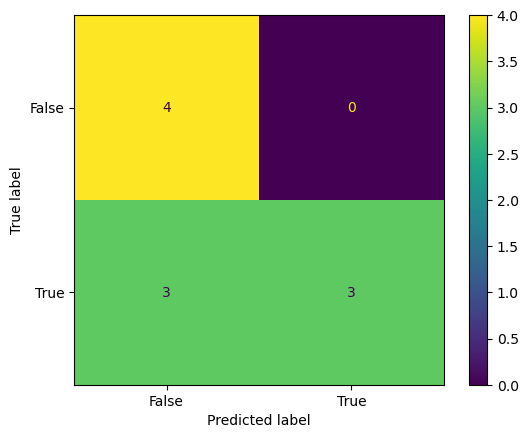

Accuracy:  0.7
Precision:  1.0
Recall:  0.5
F1:  0.6666666666666666
Predicted class (0=real, 1=fake): 0
done


In [542]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Combined_Cleaned_Text2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Import the library to build the model
from sklearn import svm
#Build the model
basemodel = svm.SVC(kernel='rbf')

#precomputed kernel gives error and excluded below
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=5)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#.best_params_ gives the best combination of tuned hyperparameters
print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)  

# Make a single prediction
test = ["Scientists secretly admit the COVID-19 cause losting leg"]
test_vec = vectorization.transform(test)
predicted_value = optimizedmodel.predict(test_vec)
print("Predicted class (0=real, 1=fake):", predicted_value[0])

print("done")


Optimized Parameters: {'kernel': 'linear'}

Accuracy of the optimized model: Accuracy: 0.7, Precision: 1.0, Recall: 0.5, F1 Score: 0.67

New Data: 0 → real news

__The optimized SVM model achieved 70% accuracy and a high precision of 1.0, indicating strong confidence in identifying fake news. However, with a recall of 0.5, it missed half of the fake news samples. The balanced F1 score (0.67) suggests decent overall performance, though the model might benefit from further tuning or more training data to improve recall.__

## Q6 - Decision Tree Optimization

Number of Rows and Columns: (48, 2)

Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 27 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'max_depth': 50, 'n_estimators': 150}
   Actual Target  Predicted Target
0              1                 0
1              0                 0
2              1                 0
3              0                 0
4              1                 1


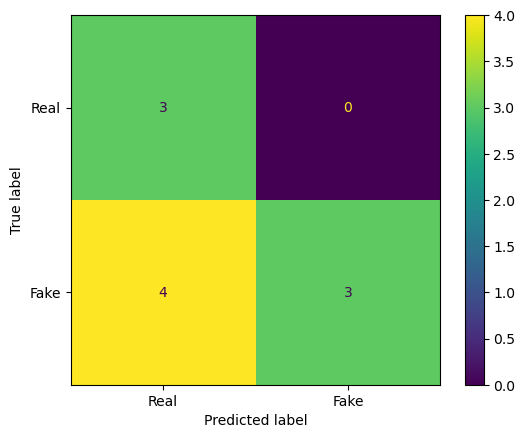

Accuracy: 0.6
Precision: 1.0
Recall: 0.42857142857142855
F1 Score: 0.6
Predicted class (0=real, 1=fake): 0
done


In [546]:
import pandas as pd
import numpy as np
import gensim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load and shuffle data
input_dataframe = pd.read_csv('Combined_Cleaned_Text2.csv', header=0, index_col=0)
shuffled_df = input_dataframe.sample(frac=1, random_state=42)

# Summary
print("Number of Rows and Columns:", shuffled_df.shape)
print("\nAre there empty cells in the dataset?\n")
print(shuffled_df.info())

# Split features and target
X = shuffled_df['CleanText'].values
y = shuffled_df['Code'].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize text data
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

# Train Word2Vec model
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=100, window=5, min_count=2)
words = set(w2v_model.wv.index_to_key)

# Generate averaged vectors
def vectorize_sentences(tokenized_sentences, model, vector_size):
    vectors = []
    for sentence in tokenized_sentences:
        vecs = [model.wv[word] for word in sentence if word in model.wv]
        if vecs:
            vectors.append(np.mean(vecs, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

X_train_vec = vectorize_sentences(tokenized_train, w2v_model, 100)
X_test_vec = vectorize_sentences(tokenized_test, w2v_model, 100)


#Train the Model
from sklearn.tree import DecisionTreeClassifier 
basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
parameters = {'max_depth': [50, 85, 150, 192, 250, 500]}

grid = GridSearchCV(rf, params, cv=5)
optimized_model = grid.fit(X_train_vec, y_train.ravel())

print("Tuned hyperparameters (best parameters):", optimized_model.best_params_)

# Predict and evaluate
y_pred = optimized_model.predict(X_test_vec)

results_df = pd.DataFrame({
    'Actual Target': y_test.ravel(),
    'Predicted Target': y_pred
})
print(results_df.head())

# Confusion Matrix
cm = confusion_matrix(y_test.ravel(), y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot()
plt.show()

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Single prediction
test_sentence = ['government confirms vaccine side effects are exaggerated by internet rumors']
test_tokenized = [test_sentence[0].split()]
test_vector = vectorize_sentences(test_tokenized, w2v_model, 100)
predicted_class = optimized_model.predict(test_vector)
print("Predicted class (0=real, 1=fake):", predicted_class[0])

print("done")



Optimized Parameters: {'max_depth': 50, 'n_estimators': 150}

Accuracy of the optimized model: Accuracy: 0.6, Precision: 1.0, Recall: 0.43, F1 Score: 0.6

New Data: 0 → real news

__The optimized random forest model reached 60% accuracy, with perfect precision (1.0), meaning every predicted fake news was actually fake. However, the low recall (0.43) shows the model missed many fake news instances. The F1 score of 0.6 reflects this imbalance, suggesting further tuning or resampling could help improve recall.__

## Q6 - Random Forest Optimized

Number of Rows and Columns: (48, 2)

Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 27 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'max_depth': 50, 'n_estimators': 150}
   Actual Target  Predicted Target
0              1                 0
1              0                 0
2              1                 0
3              0                 0
4              1                 1


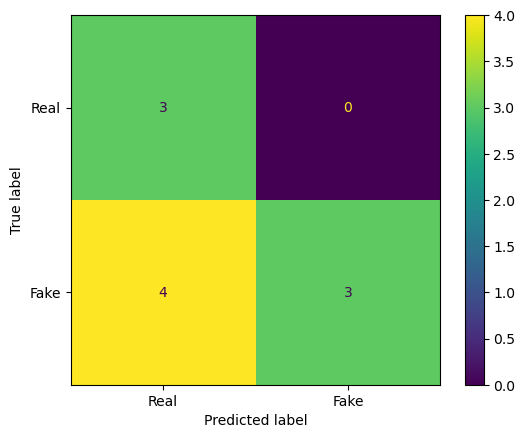

Accuracy: 0.6
Precision: 1.0
Recall: 0.42857142857142855
F1 Score: 0.6
Predicted class (0=real, 1=fake): 0
done


In [553]:
import pandas as pd
import numpy as np
import gensim
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load and shuffle data
input_dataframe = pd.read_csv('Combined_Cleaned_Text2.csv', header=0, index_col=0)
shuffled_df = input_dataframe.sample(frac=1, random_state=42)

# Summary
print("Number of Rows and Columns:", shuffled_df.shape)
print("\nAre there empty cells in the dataset?\n")
print(shuffled_df.info())

# Split features and target
X = shuffled_df['CleanText'].values
y = shuffled_df['Code'].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize text data
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

# Train Word2Vec model
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=100, window=5, min_count=2)
words = set(w2v_model.wv.index_to_key)

# Generate averaged vectors
def vectorize_sentences(tokenized_sentences, model, vector_size):
    vectors = []
    for sentence in tokenized_sentences:
        vecs = [model.wv[word] for word in sentence if word in model.wv]
        if vecs:
            vectors.append(np.mean(vecs, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

X_train_vec = vectorize_sentences(tokenized_train, w2v_model, 100)
X_test_vec = vectorize_sentences(tokenized_test, w2v_model, 100)

# Train Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [50, 100, 150]
}
grid = GridSearchCV(rf, params, cv=5)
optimized_model = grid.fit(X_train_vec, y_train.ravel())

print("Tuned hyperparameters (best parameters):", optimized_model.best_params_)

# Predict and evaluate
y_pred = optimized_model.predict(X_test_vec)

results_df = pd.DataFrame({
    'Actual Target': y_test.ravel(),
    'Predicted Target': y_pred
})
print(results_df.head())

# Confusion Matrix
cm = confusion_matrix(y_test.ravel(), y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot()
plt.show()

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Single prediction
test_sentence = ["Scientists confirm the COVID-19 vaccine turns people into 5G antennas, warns top secret report"]
test_tokenized = [test_sentence[0].split()]
test_vector = vectorize_sentences(test_tokenized, w2v_model, 100)
predicted_class = optimized_model.predict(test_vector)
print("Predicted class (0=real, 1=fake):", predicted_class[0])

print("done")


Optimized Parameters: {'max_depth': 50, 'n_estimators': 150}

Accuracy of the optimized model: Accuracy: 0.6, Precision: 1.0, Recall: 0.43, F1 Score: 0.6

New Data: 0 → real news

__The optimized random forest model achieved moderate accuracy (60%) and a perfect precision score (1.0), meaning all predicted fake news were truly fake. However, the low recall (0.43) suggests that it missed many fake news cases, classifying them as real instead. This indicates the model is cautious in labeling news as fake, prioritizing precision over sensitivity.__

# Q6 -SVM OPTIMIZED

Number of Rows and Columns: (48, 2)

Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 27 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  48 non-null     object
 1   Code       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Tuned hyperparameters (best parameters): {'C': 10, 'kernel': 'rbf'}
   Actual Target  Predicted Target
0              1                 1
1              0                 0
2              0                 0
3              0                 1
4              1                 0


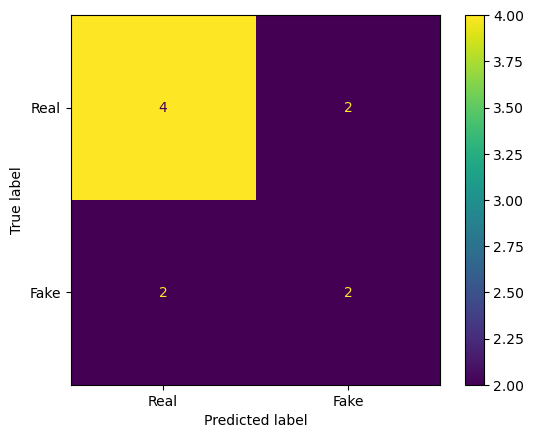

Accuracy: 0.6
Precision: 0.5
Recall: 0.5
F1 Score: 0.5
Predicted class (0=real, 1=fake): 1
done


In [612]:
import pandas as pd
import numpy as np
import gensim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

#Load and shuffle data
df = pd.read_csv('Combined_Cleaned_Text2.csv', header=0, index_col=0)
df = df.sample(frac=1, random_state=42)

print("Number of Rows and Columns:", df.shape)
print("\nAre there empty cells in the dataset?\n")
print(df.info())

# Features and target
X = df['CleanText'].values
y = df['Code'].values

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize
X_train_tokens = [text.split() for text in X_train_text]
X_test_tokens = [text.split() for text in X_test_text]

# Train Word2Vec
w2v_model = gensim.models.Word2Vec(X_train_tokens, vector_size=100, window=5, min_count=2)
words = set(w2v_model.wv.index_to_key)

def vectorize(tokens_list, model, vector_size=100):
    return np.array([
        np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)
        if any(word in model.wv for word in tokens)
        else np.zeros(vector_size) for tokens in tokens_list
    ])

X_train_vec = vectorize(X_train_tokens, w2v_model)
X_test_vec = vectorize(X_test_tokens, w2v_model)

#SVM Optimization
svm_model = SVC()
params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]                 #used C parameter to banace max, min error
}
grid = GridSearchCV(svm_model, params, cv=5)
optimized_model = grid.fit(X_train_vec, y_train)

print("Tuned hyperparameters (best parameters):", optimized_model.best_params_)

#Predictions
y_pred = optimized_model.predict(X_test_vec)

#Results
results_df = pd.DataFrame({
    'Actual Target': y_test,
    'Predicted Target': y_pred
})
print(results_df.head())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"]).plot()
plt.show()

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

#Single prediction
test_text = ["Scientists secretly admit the COVID-19 cause losting leg"]
test_tokenized = [test_text[0].split()]
test_vector = vectorize(test_tokenized, w2v_model)
test_prediction = optimized_model.predict(test_vector)
print("Predicted class (0=real, 1=fake):", test_prediction[0])

print("done")


Optimized Parameters: {'C': 10, 'kernel': 'rbf'}

Accuracy of the optimized model: Accuracy: 0.6, Precision: 0.5, Recall: 0.5, F1 Score: 0.5

New Data Prediction: 1 → fake news

__The optimized SVM model using the RBF kernel and a higher regularization value (C=10) achieved moderate performance. With 60% accuracy and balanced precision and recall scores (0.5), the model correctly identified half of both real and fake news examples. This indicates room for improvement, possibly through more data, enhanced preprocessing, or tuning additional hyperparameters.__

## Q7 - KNN Classification with  Word2Vec

Best Parameters: {'n_neighbors': 9}
Accuracy: 0.8
Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333334


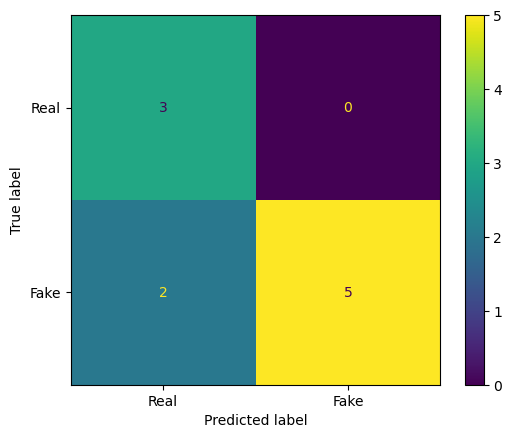

Predicted class (0 = real, 1 = fake): 1


In [567]:
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)


df = pd.read_csv('Combined_Cleaned_Text2.csv', header=0, index_col=0)
df = df.sample(frac=1, random_state=42)

#Features and target
X = df['CleanText'].values
y = df['Code'].values

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Word2Vec
X_train_tokens = [sentence.split() for sentence in X_train_text]
X_test_tokens = [sentence.split() for sentence in X_test_text]

#Train Word2Vec model
w2v_model = gensim.models.Word2Vec(X_train_tokens, vector_size=100, window=5, min_count=2)
words = set(w2v_model.wv.index_to_key)

# Function to vectorize text
def vectorize(text_tokens):
    return np.array([
        np.mean([w2v_model.wv[word] for word in tokens if word in words], axis=0)
        if any(word in words for word in tokens)
        else np.zeros(100) for tokens in text_tokens
    ])

#Vectorize train/test
X_train_vect = vectorize(X_train_tokens)
X_test_vect = vectorize(X_test_tokens)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vect)
X_test_scaled = scaler.transform(X_test_vect)

#KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

#Predictions and Evaluation
y_pred = grid.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot()
plt.show()

#single predict
new_text = ['5G towers are causing COVID symptoms secretly']
new_tokens = [new_text[0].split()]
new_vec = vectorize(new_tokens)
new_vec_scaled = scaler.transform(new_vec)
new_pred = grid.predict(new_vec_scaled)

print("Predicted class (0 = real, 1 = fake):", new_pred[0])


Optimized Parameters: {'n_neighbors': 9}

Accuracy of the optimized model:
Accuracy: 0.8, Precision: 1.0, Recall: 0.714, F1 Score: 0.83

New Data: 1 → fake news 

__The optimized KNN model performed well with 80% accuracy and a perfect precision score, meaning all predicted fake news were truly fake. The recall score (0.714) shows it missed some fake samples, but overall, the high F1 score (0.83) indicates a strong balance. The model also successfully identified the new input as fake news.__